# Image Load

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pylab as plt

In [2]:
img_lena = Image.open('./lena_gray.bmp')
img_lena.size
imgWidth = img_lena.size[1]
imgHeight = img_lena.size[0]

print(imgWidth,imgHeight)

512 512


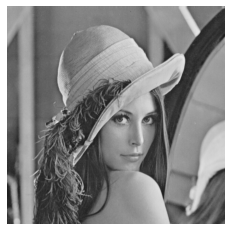

In [3]:
image_lena_arr = np.array(img_lena)

plt.imshow(image_lena_arr)
plt.axis('off')
plt.show()

In [4]:
image_lena_arr

array([[[162, 162, 162],
        [162, 162, 162],
        [162, 162, 162],
        ...,
        [170, 170, 170],
        [155, 155, 155],
        [128, 128, 128]],

       [[162, 162, 162],
        [162, 162, 162],
        [162, 162, 162],
        ...,
        [170, 170, 170],
        [155, 155, 155],
        [128, 128, 128]],

       [[162, 162, 162],
        [162, 162, 162],
        [162, 162, 162],
        ...,
        [170, 170, 170],
        [155, 155, 155],
        [128, 128, 128]],

       ...,

       [[ 43,  43,  43],
        [ 43,  43,  43],
        [ 50,  50,  50],
        ...,
        [104, 104, 104],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 44,  44,  44],
        [ 44,  44,  44],
        [ 55,  55,  55],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [108, 108, 108]],

       [[ 44,  44,  44],
        [ 44,  44,  44],
        [ 55,  55,  55],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [108, 108, 108]]

In [5]:
image_lena_arr.size

786432

In [6]:
Alst = [] # RGB중 하나의 값만 담을 Matrix

for i in range(imgHeight):
    arr = []
    for j in range(imgWidth):
        arr.append(image_lena_arr[i,j,0])
    Alst.append(arr)

In [7]:
A = np.array(Alst)

# Make Haar Matrix

In [8]:
# Haar Matrix H 구성
def makeHaarMatrix(n):
    if n > 2:
        h = makeHaarMatrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    h_i = np.kron(np.eye(len(h)), [1, -1])
    # combine parts
    h = np.vstack((h_n, h_i))
    return h

# 벡터 정규화
def normalize(h):
    norms = np.linalg.norm(h, axis=0)
    return h/norms

def cut(h, n):
    zeroMat = np.zeros_like(h)
    zeroMat[:n,:n] = h[:n,:n]
    return zeroMat

In [9]:
# Haar Matrix를 만들고 normalize
Haar = makeHaarMatrix(imgWidth)
Haar = Haar.T
normH = normalize(Haar)
normHT = normH.T

In [10]:
# B = H' * A * H 

B1 = np.matmul(normHT,A)
B = np.matmul(B1,normH)

In [11]:
# 행렬 B 자르기
n = 64
Bhat = cut(B, n)

In [12]:
# Ahat = H * Bhat * H`
Ahat1 = np.matmul(normH,Bhat)
Ahat = np.matmul(Ahat1,normHT)

In [13]:
# 원래의 Matrix(R,G,B)로 복원
Are = []

for i in range(imgHeight):
    lst = []
    for j in range(imgWidth):
        lst2 = []
        for z in range(3):
            lst2.append(Ahat[i,j])
        lst.append(lst2)
    Are.append(lst)
    
Are = np.array(Are, dtype = 'u1')

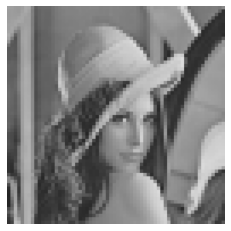

In [14]:
plt.imshow(Are)
plt.axis('off')
plt.show()

In [15]:
resultImg = Image.fromarray(Are)
resultImg.save('result%d.bmp'%n)

# Haar Matrix 나누기

In [41]:
def AreMatrix(h):
    Are = []

    for i in range(imgHeight):
        lst = []
        for j in range(imgWidth):
            lst2 = []
            for z in range(3):
                lst2.append(h[i,j])
            lst.append(lst2)
        Are.append(lst)

    return np.array(Are, dtype = 'u1')

In [42]:
Hl = normHT[:int(imgHeight/2),:]
Hh = normHT[int(imgHeight/2):,:]

# IDHWT
# 1. Hl^T * Hl * A * Hl^T * Hl

one =  Hl.T @ Hl @ A @ Hl.T @ Hl

# 2. Hl^T * Hl * A * Hh^T * Hh

two = Hl.T @ Hl @ A @ Hh.T @ Hh

# 3. Hh^T * Hh * A * Hl^T * Hl

three = Hh.T @ Hh @ A @ Hl.T @ Hl

# 4. Hh^T * Hh * A * Hh^T * Hh

four = Hh.T @ Hh @ A @ Hh.T @ Hh

In [43]:
oneAre = AreMatrix(one)
twoAre = AreMatrix(two)
threeAre = AreMatrix(three)
fourAre = AreMatrix(four)

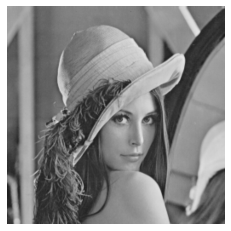

In [65]:
plt.imshow(oneAre)
plt.axis('off')
plt.show()
Image.fromarray(oneAre).show()

In [68]:
Image.fromarray(oneAre).show()
Image.fromarray(twoAre).show()
Image.fromarray(threeAre).show()
Image.fromarray(fourAre).show()

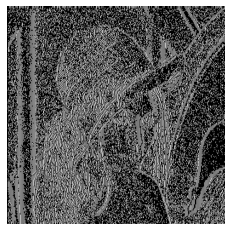

In [45]:
plt.imshow(twoAre)
plt.axis('off')
plt.show()

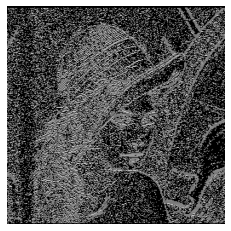

In [46]:
plt.imshow(threeAre)
plt.axis('off')
plt.show()

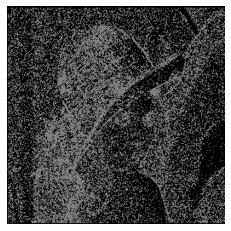

In [47]:
plt.imshow(fourAre)
plt.axis('off')
plt.show()

# Haar Matrix 나누기 (2)

In [52]:
Hll = Hl[:int(Hl.shape[0]/2),:]
Hlh = Hl[int(Hl.shape[0]/2):,:]

In [53]:
# 5. Hll^T * Hll * A * Hll^T * Hll

five = Hll.T @ Hll @ A @ Hll.T @ Hll

# 6. Hll^T * Hll * A * Hlh^T * Hlh

six = Hll.T @ Hll @ A @ Hlh.T @ Hlh

# 7. Hlh^T * Hlh * A * Hll^T * Hll

seven = Hlh.T @ Hlh @ A @ Hll.T @ Hll

# 8. Hlh^T * Hlh * A * Hlh^T * Hlh

eight = Hlh.T @ Hlh @ A @ Hlh.T @ Hlh

In [54]:
fiveAre = AreMatrix(five)
sixAre = AreMatrix(six)
sevenAre = AreMatrix(seven)
eightAre = AreMatrix(eight)

In [69]:
Image.fromarray(fiveAre).show()
Image.fromarray(sixAre).show()
Image.fromarray(sevenAre).show()
Image.fromarray(eightAre).show()

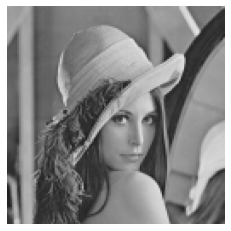

In [55]:
plt.imshow(fiveAre)
plt.axis('off')
plt.show()

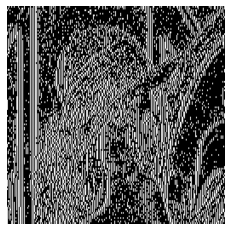

In [56]:
plt.imshow(sixAre)
plt.axis('off')
plt.show()

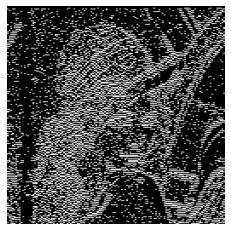

In [57]:
plt.imshow(sevenAre)
plt.axis('off')
plt.show()

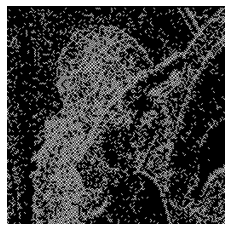

In [58]:
plt.imshow(eightAre)
plt.axis('off')
plt.show()